## La gran pandemia

Durante el 2015 hubo una gran pandemia a nivel mundial. Luego de un año del descubrimiento del virus, se realizó un catastro de enfermos. Cómo es posible observar en el siguiente gráfico, los resultados indicaron que los países más afectados fueron Francia, Japón y México, con más de 9.5 millones, 10.2 millones y 10.3 millones de contagiados respectivamente.


## V1 - Importar librerías requeridas
Se importan las librerías requeridas para esta visualización

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## V1 - Carga de dataset
Dataset: V01.csv

In [2]:
# Se utiliza pandas para cargar dataset
df1 = pd.read_csv("v01.csv")

df1.head(5)

,Paises,Contagiados
0,España,569457
1,Chile,1088398
2,Guinea,1302202
3,Ecuador,1930001
4,Rusia,2000091


In [3]:
# Identifico cuantos paises (registros) posee el dataset
df1.count()

Paises         20
Contagiados    20
dtype: int64

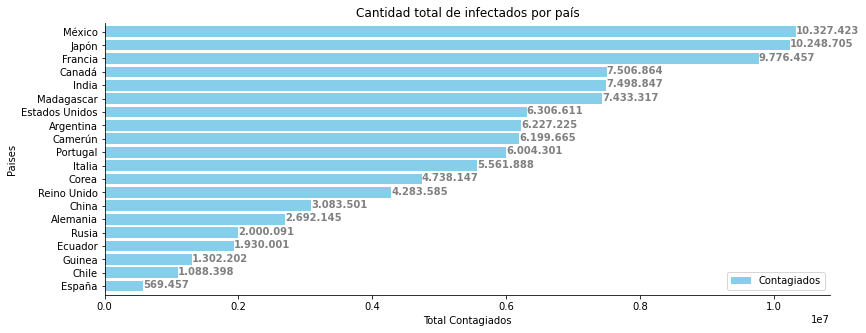

In [32]:
# Se especifica las dimensiones del gráfico para mejorar visualización
plt.rcParams['figure.figsize'] = (13.0,5.0)

# V01: Visualización que permite ver la cantidad total de infectados por país
ax = df1.plot.barh(x='Paises'
                  ,y='Contagiados'
                  ,color = 'skyblue'
                  , width=0.8
                  , title = 'Cantidad total de infectados por país')

ax.set_xlabel("Total Contagiados")
ax.set_ylabel("Paises")

# Se oculta borde derecho y superior para no superponer la cifra en el borde
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Para cada pais se le añade el label de total de contagiados.
# Se formatea número con puntos para mejorar lectura de miles.
for i, v in enumerate(df1.Contagiados):
    ax.text(v, i - .15, str.replace(format(v, ','),',', '.'), color='gray', fontweight='bold')

plt.show()

## **Visualización 1 (V01)**

**Tarea identificada**: Identificar - Extremos.

**Justificación**: `Se utiliza para esta visualización el gráfico de barras horizontal con el objetivo de identificar de mejor forma los 20 paises y la cantidad de personas infectadas en cada uno de ellos como tambien los extremos donde se aprecia México, Japón y Francia como los más afectados. Los paises en el eje Y se muestran mejor a que si estuvieran en el eje x de forma vertical y añadir la cifra en cada una de las barras permite mostrar la cantidad exacta, por otra parte y de manera pre-atentiva el gráfico muestra inmediatamente que los paises superiores poseen mayores contagios que los inferiores.`

-----------

Explorando los datos históricos de esta pandemia, fue posible recopilar la información de cantidad de contagiados internacionalmente durante los primeros 5 años y los resultados mostraron un crecimiento exponencial de los casos.

## V2 - Importar librerías requeridas
Se importan las librerías requeridas para esta visualización

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## V2 - Carga de dataset
Dataset: V02.csv

In [6]:
df2 = pd.read_csv("v02.csv")
df2.head(5)

,Año,Total Contagiados
0,2013,104778830
1,2014,168031244
2,2015,248136117
3,2016,372664870
4,2017,550371599


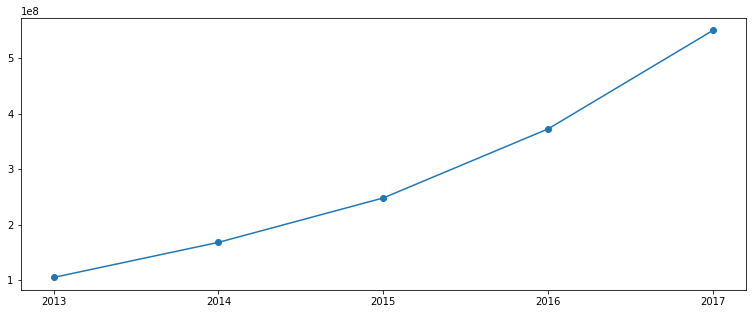

In [7]:
# V02: Visualización que permita ver la evolución del total de infectados en el tiempo (fecha).
plt.plot(df2['Año'], df2['Total Contagiados'], marker = 'o')
plt.xticks(df2.Año)
plt.show()

**Visualización 2 (V02)**

**Tarea identificada**: Descubrir - Tendencia.

**Justificación**: `Conforme a los datos historicos de la pandemia en donde la tarea de descubrir como fue la evolución de infectados durante los años, se presenta mediante visualización en modo de gráfico de lineas la tendencia de los contagiados que confirma su crecimiento exponencial.`

----

Ahora, comparando la situación por país, es posible notar cómo en algunos países, como Chile, la infección fue controlada mientras en otros no, como México. Esto se explica por la anticipada toma de decisiones en salud realizados en varios de estos países.


## V3 - Importar librerías requeridas
Se importan las librerías requeridas para esta visualización

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## V3 - Carga de dataset
Dataset: V03.csv

In [37]:
df3 = pd.read_csv("v03.csv")
df3.head(5)

,Pais,2013,2014,2015,2016,2017
0,Estados Unidos,6306611,12034284,21975254,30424000,60688631
1,España,569457,956750,1782312,2593025,3446904
2,Italia,5561888,8845776,16387430,16965989,18440429
3,Francia,9776457,13885349,16601864,25421972,46797459
4,Alemania,2692145,2600368,2507329,2417294,2326443


In [38]:
# Se aplica un inverse pivot, mediante el metodo .melt()
df3 = df3.melt('Pais', var_name='Año', value_name='Contagiados')
df3.head(5)

,Pais,Año,Contagiados
0,Estados Unidos,2013,6306611
1,España,2013,569457
2,Italia,2013,5561888
3,Francia,2013,9776457
4,Alemania,2013,2692145


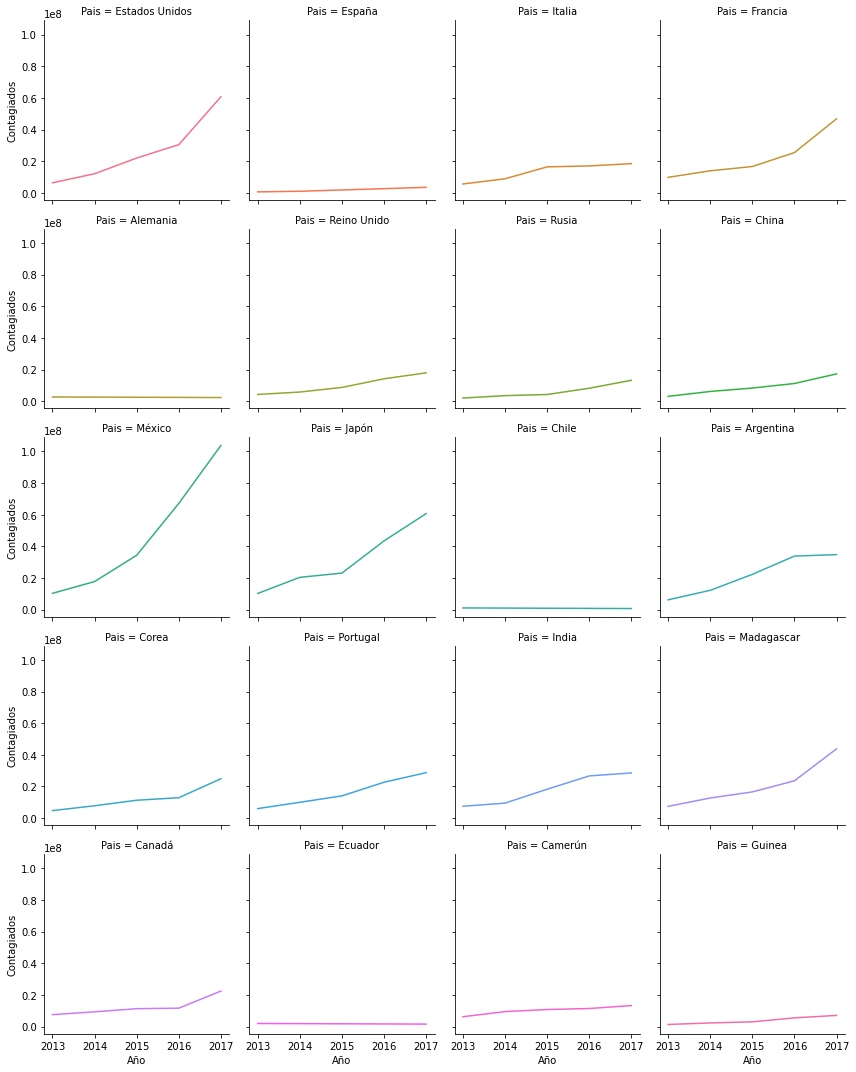

In [39]:
# Se aplica la función FacetGrid que solo genera los gráficos sin datos, 
# luego se indica que debe cargarse con el df3, columna pais y hue pais
grid = sns.FacetGrid(data=df3, col="Pais", hue="Pais", col_wrap=4)

# Llamamos al método map que se encarga de llenar cada gráfico de la grilla. Sus argumentos son:
grid.map(plt.plot, "Año", "Contagiados")

# Visualizar el gráfico
plt.show()

**Visualización 3 (V03)**

**Tarea identificada**: Comparar - Tendencias

**Justificación**: Se crea una small multiple donde en cada celda se presenta el País para lograr comparar de mejor forma las tendencias y dar a conocer en que país esta mejor controlada la infección. 

---

Las visualizaciones anteriores colocan la evolución del contagios según las fechas de ocurrencia, pero la realidad es que cada país tuvo su primer infectado en distintos momentos. Al encontrarse en distintas escalas de tiempo, surge la interrogante de cómo distribuyen los crecimientos de contagios bajo una misma escala de tiempo, que corresponde al tiempo que lleva el país con infecciones presentes. Por ejemplo, se encontró que a los dos meses de infección, el mínimo de contagios presentes en un país fue de 783 casos, el máximo de 8055 casos, y la mediana a nivel mundial fue de 2876 casos aproximadamente. 


## V4 - Importar librerías requeridas
Se importan las librerías requeridas para esta visualización

In [13]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

## V4 - Carga de dataset
Dataset: V04.csv

In [69]:
df4 = pd.read_csv("v04.csv")
df4.head(5)

,Pais,Mes,Contagiados
0,Estados Unidos,1,5230
1,Estados Unidos,2,4785
2,Estados Unidos,3,4217
3,Estados Unidos,4,704
4,Estados Unidos,5,8694


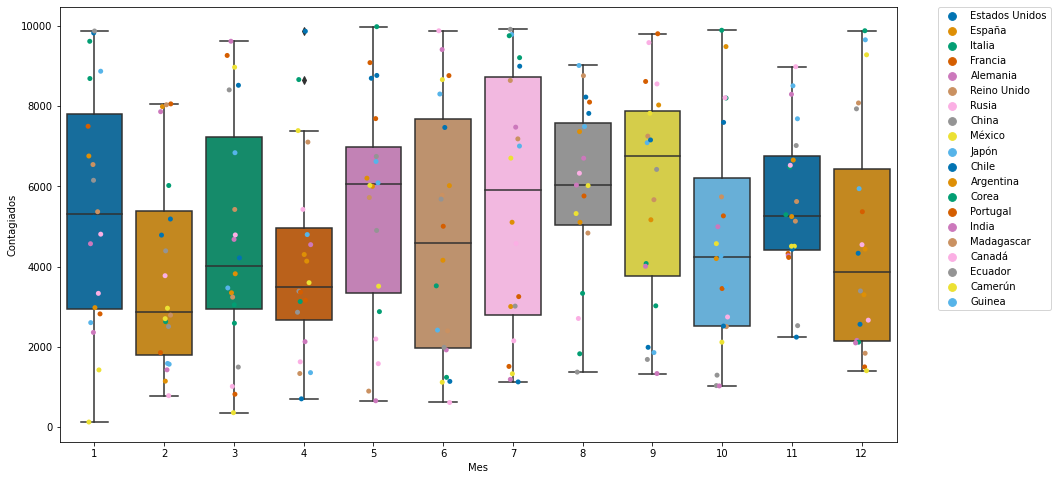

In [115]:
sns.boxplot(data=df4, x="Mes", y="Contagiados" , palette="colorblind")
bplot = sns.stripplot(x='Mes', y='Contagiados' , data=df4, hue='Pais', palette='colorblind', 
                   marker='o' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




**Visualización 4 (V04)**

**Tarea identificada**: Presentar - Distribución

**Justificación**: `Para resta visualización, se utiliza un boxplot para mostrar la distribución de infectados por cada mes y posiciona al país como una marca de punto para mostrar la cantidad de infectados que poseía en ese momento de tiempo bajo esa distribución.`

---

Otra interrogante que surgió fue ¿este virus fue más letal en épocas y lugares de bajas temperaturas, de altas temperaturas o la temperatura no tuvo efecto? En base a los datos reunidos de facellimientos registrados por mes en los 5 primeros años, fue posible observar lo siguiente para cada hemisferio:


## V5 - Importar librerías requeridas
Se importan las librerías requeridas para esta visualización

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## V5 - Carga de dataset
Datasets: V05-hem-norte.csv y V05-hem-sur.csv

In [44]:
df5n = pd.read_csv("V05-hem-norte.csv")
df5s = pd.read_csv("V05-hem-sur.csv")

df5s.head(5)

,Año,Mes,Fallecidos
0,2013,07-Julio,243560
1,2013,08-Agosto,297685
2,2013,09-Septiembre,255738
3,2013,10-Octubre,202459
4,2013,11-Noviembre,260474


In [45]:

# Se utiliza función pivot para indexar el dataset en el formato de matriz.
# Hemisferio Norte
# Columnas = Año , Filas= Mes , value= Fallecidos
df5n = df5n.pivot(index="Mes", columns="Año", values="Fallecidos")
df5n.head()

# Hemisferio Sur
# Columnas = Año , Filas= Mes, value= Fallecidos
df5s = df5s.pivot(index="Mes", columns="Año", values="Fallecidos")
df5s.head()

Año,2013,2014,2015,2016,2017
Mes,,,,,
01-Enero,159836,217682,255738,274766,388851
02-Febrero,204658,207787,282801,320561,368385
03-Marzo,152225,229775,297685,354304,410247
04-Abril,169139,242419,282801,337433,429783
05-Mayo,234427,277819,378872,445411,470156


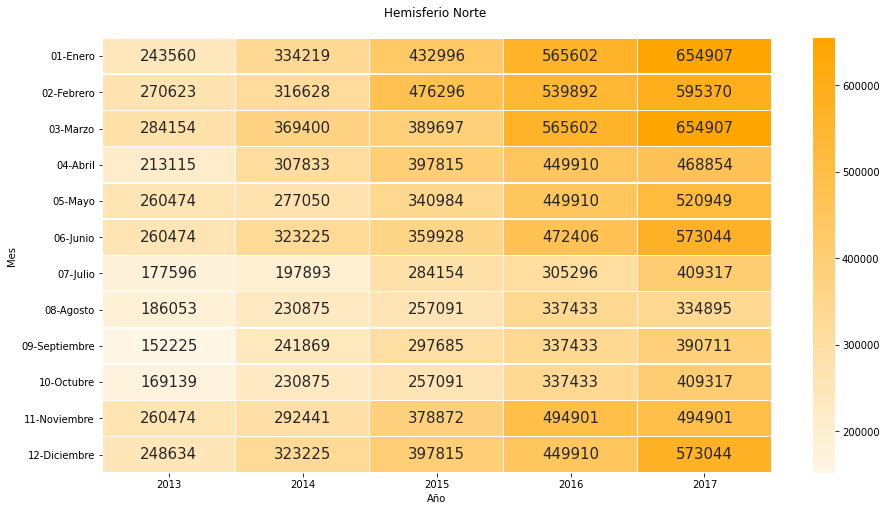

In [56]:
# plt.rcParams['figure.figsize'] permite específicar las dimensiones del gráfico creado
plt.rcParams['figure.figsize'] = (15.0, 8.0)
# sns.heatmap recibe el dataset indexado y crea un mapa de calor
pal = sns.light_palette("Orange", as_cmap=True)
ax = sns.heatmap(df5n, annot=True, fmt="d",
                 annot_kws={'size':15}, cmap=pal, linewidths=.5).set(title = "Hemisferio Norte \n")

`El verano en el hemisferio norte aproximadamente parte a fines de junio, lo cual demuestra que durante todos los años existio un menor contagio cuando existían altas temperaturas o había mayor contagios en los meses frios.`

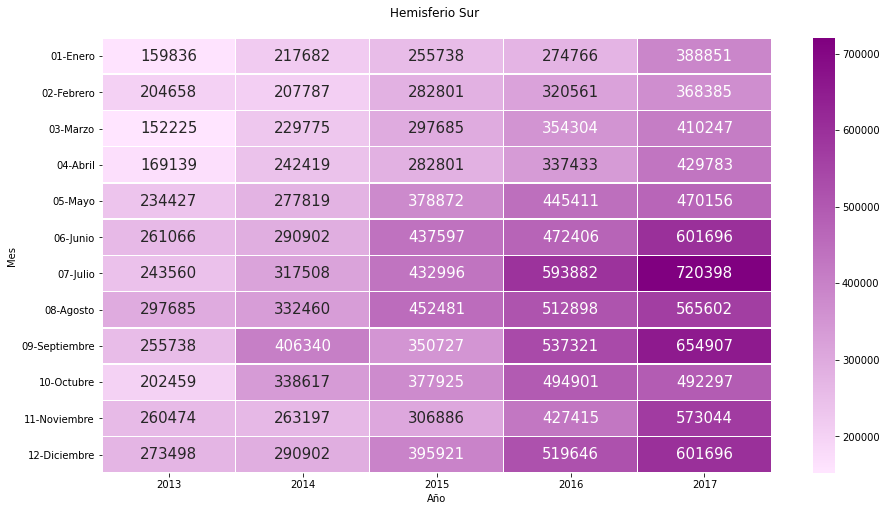

In [54]:
# plt.rcParams['figure.figsize'] permite específicar las dimensiones del gráfico creado
plt.rcParams['figure.figsize'] = (15.0, 8.0)
# sns.heatmap recibe el dataset indexado y crea un mapa de calor
pal = sns.light_palette("Purple", as_cmap=True)
ax2 = sns.heatmap(df5s, annot=True, fmt="d",
                  annot_kws={'size':15}, cmap=pal, linewidths=.5).set(title = "Hemisferio Sur \n")

`El verano en el hemisferio sur aproximadamente parte a fines de diciembre, lo cual demuestra que durante todos los años existio un menor contagio cuando existían altas temperaturas o había mayor contagios en los meses frios.`

**Visualización 5 (V05)**

**Tarea identificada**: Descubrir - Dependencia

**Justificación**: `Se presenta la visualización mediante dos mapas de calor para descubrir si la temperatura tenía incidencia en la cantidad de contagios tanto para el hemisferio norte y hemisferio sur. La visualización demuestra que existe una dependencia entre variables, en este caso los contagios con la temperatura`
* La explicación de temporadas de calor y baja temperatura está debajo de cada heatmap.

-----

Por otro lado, esta pandemia que se caracterizó por una división etárea muy marcada entre sus contagiados. El 60% de los contagiados eran personas sobre 50 años, 30% eran menores a los 18 años y solo el 10% restante oscila entre 19 y 49 años. Por otro lado, el 80% presentaba como síntomas base: fiebre, tos y malestar estomacal; mientras que el 20% restante presentó síntomas extendidos a los anteriores, agregando dificultad para respirar. 

## V6 - Importar librerías requeridas
Se importan las librerías requeridas para esta visualización

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## V6 - Carga de dataset
Dataset: V06.csv

In [24]:
df6 = pd.read_csv("V06.csv")
df6.head(5)

,Edad,Sintomas
0,>=50,base
1,>=50,base
2,>=50,base
3,>=50,base
4,>=50,base


In [57]:
# Se Agrupa infectados por edad 
infectados_edad = df6.groupby('Edad')['Edad'].count()

# Se Agrupa por síntomas posibles
sintomas_posibles = df6.groupby('Sintomas')['Sintomas'].count()

print(infectados_edad)

Edad
19-49     40
<=18     120
>=50     240
Name: Edad, dtype: int64


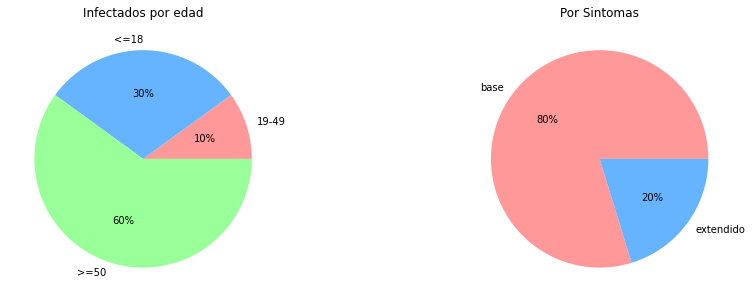

In [60]:
#Se definen otros colores en formato hexadecimal
colors = ['#ff9999','#66b3ff','#99ff99']

# Se crea figura para presentar dos gráficos uno al lado del otro
fig, (ax1,ax2)= plt.subplots(1, 2, figsize=(15, 5))

# Se crea el gráfico para los no sobrevivientes
ax1.pie(infectados_edad, labels = infectados_edad.index, autopct='%.0f%%', colors=colors)
ax1.set_title('Infectados por edad')

# Se crea el gráfico para los sobrevivientes
ax2.pie(sintomas_posibles, labels = sintomas_posibles.index, autopct='%.0f%%', colors=colors)
ax2.set_title('Por Sintomas')

# Visualizar el gráfico
plt.show()

**Visualización 6 (V06)**

**Tarea identificada**: Presentar - Distribución (Tamara Munzner, Example: Pie Chart , Fig 7.17)

**Justificación**: `Se utiliza 2 gráficos de torta con la finaidad de presentar la distribución de cantidad infectados por edad, en este caso los mayores de 50 años son los más afectados, por otra parte se visualiza facilmente en el otro gráfico de torta la proporción de sintomas Base o Extendido.`

-----

Además de esta segmentación etárea y de diagnóstico, la investigación inicial no tenía una caracterización más profunda. Fue tras cruzar y analizar la correlación de atributos de edad, peso y altura de contagiados; e identificando aquellos con síntomas base o síntomas extendidos, que se logró obtener una mejor descripción de perfiles.


## V7 - Importar librerías requeridas
Se importan las librerías requeridas para esta visualización

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## V7 - Carga de dataset
Dataset: V07.csv

In [29]:
df7 = pd.read_csv("V07.csv")
df7.head()

,Edad,Sintomas,Peso,Altura
0,70,base,72,155
1,71,base,61,161
2,83,base,66,179
3,77,base,63,190
4,76,base,80,164


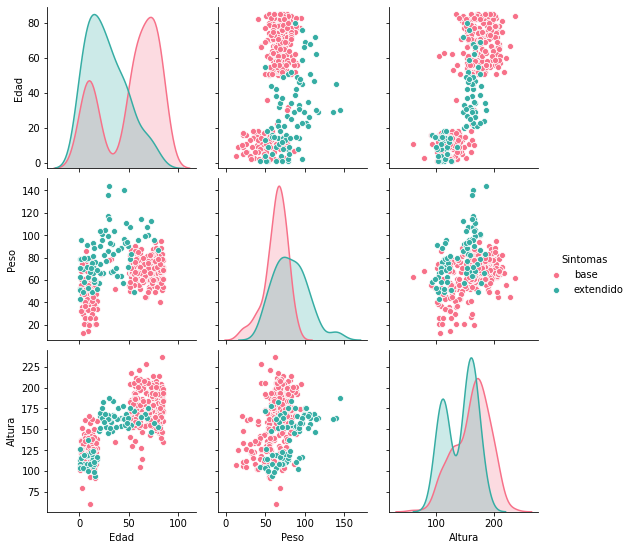

In [63]:
# Como la matriz generalmente es simetrica, podemos ahorrarnos una mitad con el parámetro corner
# y personalizar más codificación usando tonalidad de color (hue)
# y cambio de paleta (palette)
g = sns.pairplot(df7, hue="Sintomas", palette="husl")

**Visualización 7 (V07)**

**Tarea identificada**: Descubrir e Identificar - Correlaciones y Distribuciones.

**Justificación**: `Se utiliza una matris de distribución y correlación para descubrir e identificar las correlaciones y distribuciones al cruzar y analisar los distintintos atributos como edad, peso y altura sumado a la utilización de hue=Sintomas para presentar una mejor descripción de los perfiles.`

----